In [17]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns

In [18]:
data = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [20]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [21]:
X = data.drop('Class', axis=1)
y = data['Class']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
print("Shapes of training and testing sets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

Shapes of training and testing sets:
X_train: (1750, 12) X_test: (750, 12)


In [24]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
print("Descriptive statistics of the training set:")
print(X_train.describe())

Descriptive statistics of the training set:
               Area     Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  1.750000e+03  1.750000e+03       1.750000e+03       1.750000e+03   
mean  -3.014731e-16 -1.218073e-16       9.115248e-16       6.851662e-16   
std    1.000286e+00  1.000286e+00       1.000286e+00       1.000286e+00   
min   -2.406636e+00 -2.395891e+00      -2.424652e+00      -3.190077e+00   
25%   -7.280635e-01 -7.411581e-01      -7.423984e-01      -6.177642e-01   
50%   -9.844978e-02 -6.773318e-02      -1.039509e-01      -3.987513e-02   
75%    6.759871e-01  6.773412e-01       6.460535e-01       6.382699e-01   
max    4.081144e+00  3.926519e+00       3.638346e+00       3.083191e+00   

        Convex_Area  Equiv_Diameter  Eccentricity      Solidity        Extent  \
count  1.750000e+03    1.750000e+03  1.750000e+03  1.750000e+03  1.750000e+03   
mean  -2.618858e-16    6.070065e-16  1.511426e-15  3.865962e-14  1.463718e-15   
std    1.000286e+00    1.000286e+00  

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [26]:
y_pred = svc.predict(X_test)

In [27]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
linear_svc = SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train, y_train)
y_pred_test = linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
y_pred_train = linear_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Model accuracy score with default hyperparameters: 0.8627
Model accuracy score with linear kernel and C=1.0: 0.8533
Training-set accuracy score: 0.8914


Confusion matrix

 [[344  45]
 [ 65 296]]


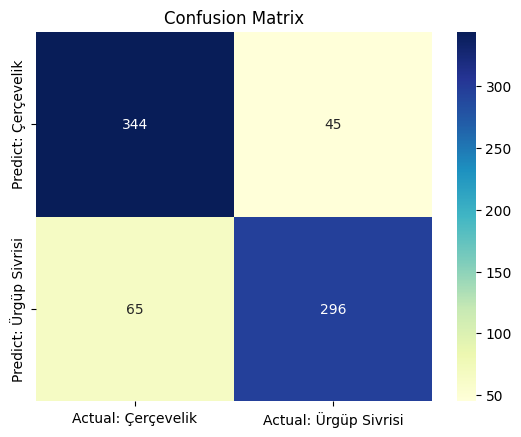

In [28]:
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
class_names = y.unique()  
cm_matrix = pd.DataFrame(data=cm, columns=[f'Actual: {cls}' for cls in class_names], 
                         index=[f'Predict: {cls}' for cls in class_names])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

   Çerçevelik       0.84      0.88      0.86       389
Ürgüp Sivrisi       0.87      0.82      0.84       361

     accuracy                           0.85       750
    macro avg       0.85      0.85      0.85       750
 weighted avg       0.85      0.85      0.85       750



C:\Users\yahya\AppData\Local\Temp\ipykernel_18628\3672447334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.unique(), y=np.diagonal(cm), palette="viridis")


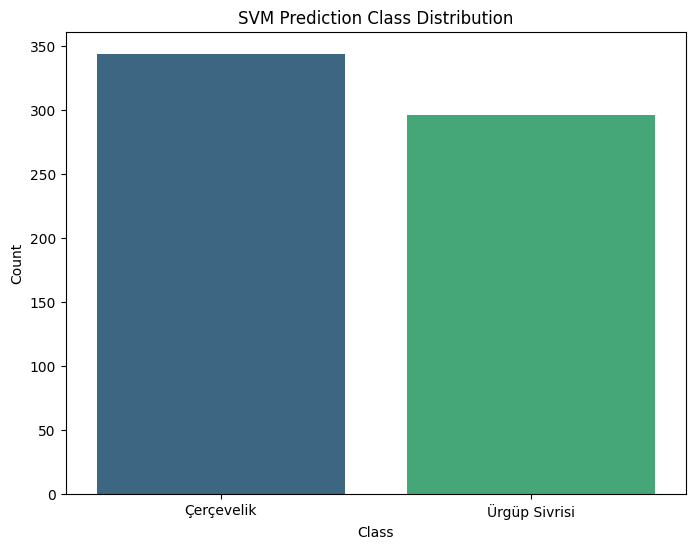

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x=y.unique(), y=np.diagonal(cm), palette="viridis")
plt.title("SVM Prediction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [31]:
c_values = [0.1, 1, 10, 100,1000]
print("\nExperimenting with different C values:")
for c_value in c_values:
    svc = SVC(kernel='linear', C=c_value)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f'Model accuracy score with C={c_value}: {accuracy_score(y_test, y_pred):0.4f}')


Experimenting with different C values:
Model accuracy score with C=0.1: 0.8413
Model accuracy score with C=1: 0.8533
Model accuracy score with C=10: 0.8627
Model accuracy score with C=100: 0.8627
Model accuracy score with C=1000: 0.8760


In [32]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

import pickle
with open("svm_pumpkin_model.pkl", "wb") as svm_file:
    pickle.dump(svm_model, svm_file)

print("SVM model has been saved successfully!")

SVM model has been saved successfully!
